# Simple Linear Regression
> Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

1. **Analyze tips data from seaborn**
    - Total Bill as Independent Variable
    - Tips as Dependent Variable
2. **Analyze the reletionship**   
3. **Apply Simple Linear Regression**    
4. **Perform F-Test and T-Test**    
5. **Interpret the result**

## Import Libary & Data

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



## Model

In [3]:
y = tips['tip'] # Dependent
x = tips[['total_bill']] # Independent
x = sm.add_constant(x) # Add constant

In [4]:
model = sm.OLS(y, x) # Model Definition

result = model.fit()  # Fitting Model

In [5]:
print(result.summary()) # OLS regression

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           6.69e-34
Time:                        15:38:53   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

**Model :**   
y = 0.9203 + 0.1050x

**Summary Result point:**
1. R-Square = 45.7 % : It means the model can explain 45.7 % variance value from tips, the rest can't be explained
2. Prob (F-Statistics) = F-Test = 6.69e-34 : Less than alpha(0.05), it means total_bill has a significant effect on tips (6.69e-34 < 0.05)
3. Prob Coef for every variable = Bo and B1     
    - Bo p-value : 0.000... < 0.05, it means we need intercept in model     
    - B1 p-value : 0.000... < 0.05, it means total_bill has positive effect on tips
4. Coef for every variable = T-Test Prob from Bo and B1
    - Bo : y = Bo + B1x, y when x = 0. tips when total_bill = 0
    - B1 : for every 10 dollars increase in total_bill, tips will increase by approximately 1.050 dollars

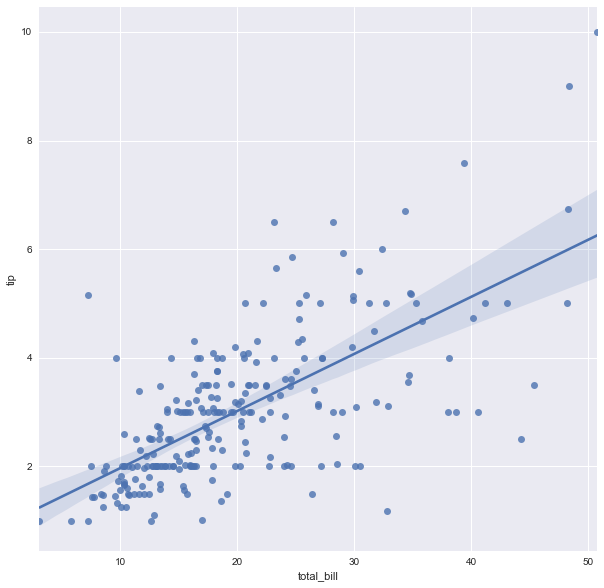

In [8]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'total_bill', y = 'tip', data=tips) # regression plotting
plt.show()